In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
import glob
%matplotlib inline
np.random.seed(42)
plt.style.use('bmh')

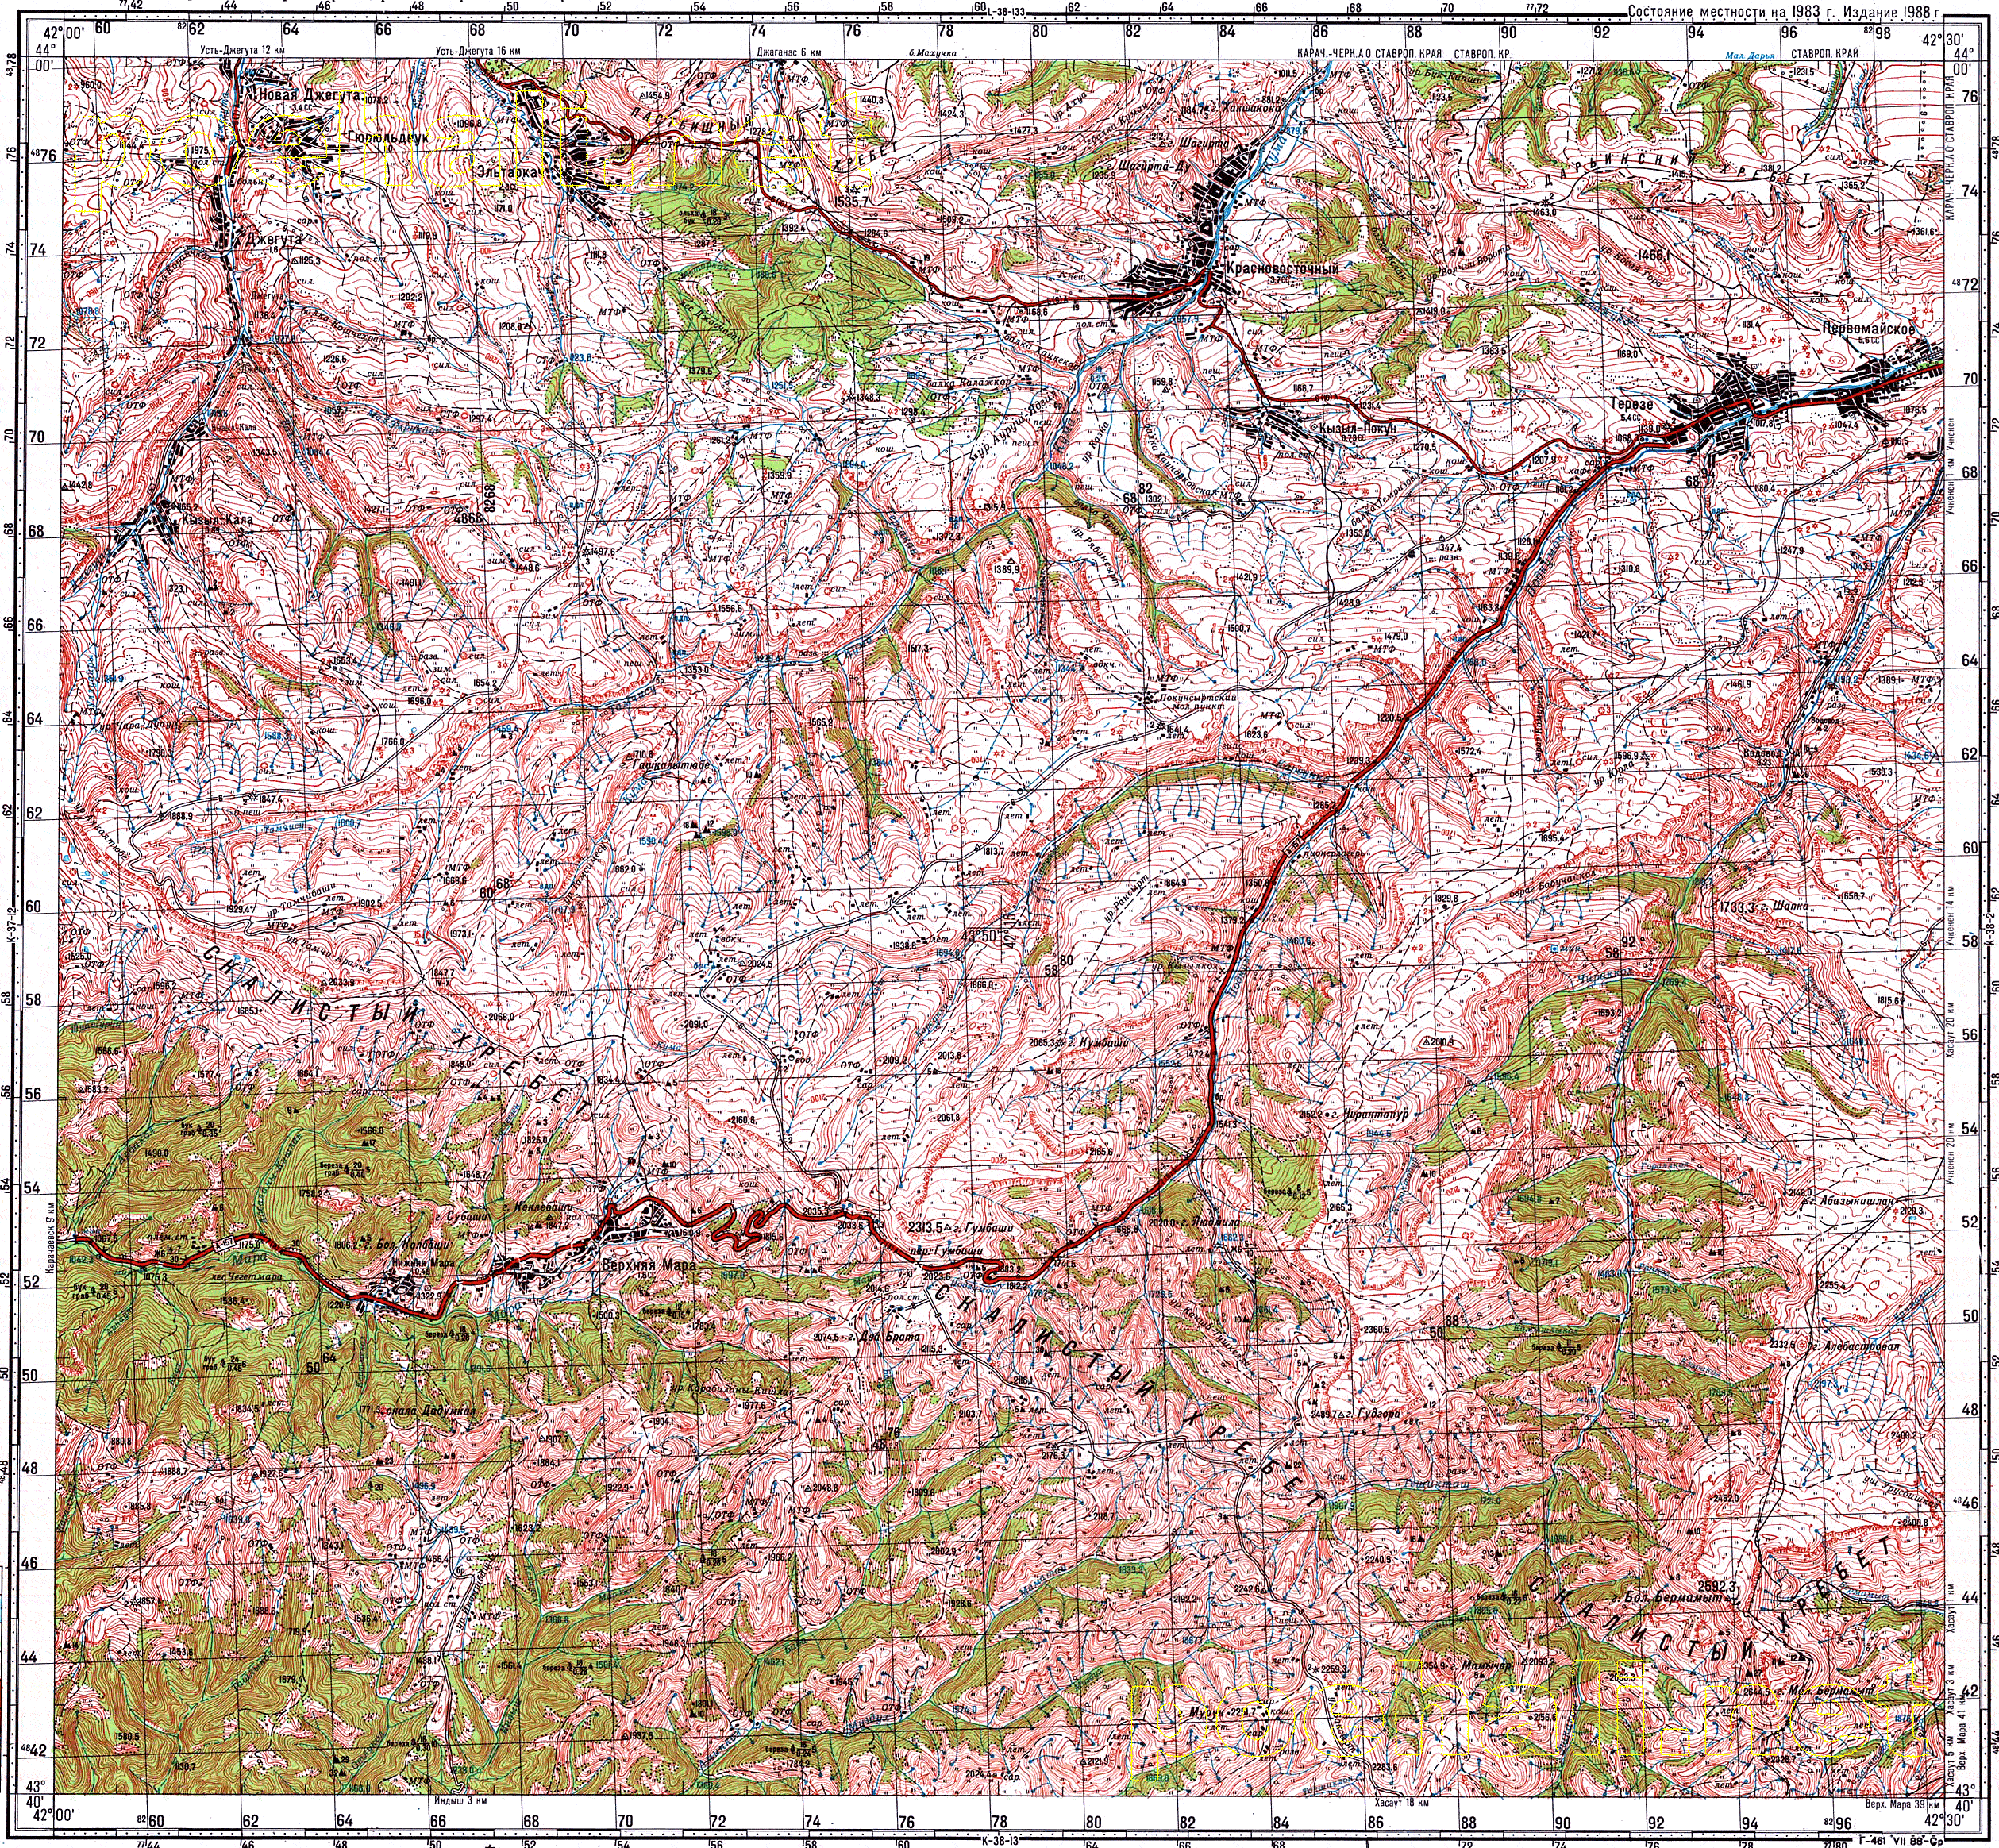

In [2]:
sample_img = Image.open('k38_lom_imgs/100k--k38-001.gif')
sample_img

In [97]:
img_fps = glob.glob('./k38_lom_imgs/*.gif')
sample_img_fps = np.random.choice(img_fps, 5)
sample_imgs = [ndimage.imread(img_fp) for img_fp in sample_img_fps]

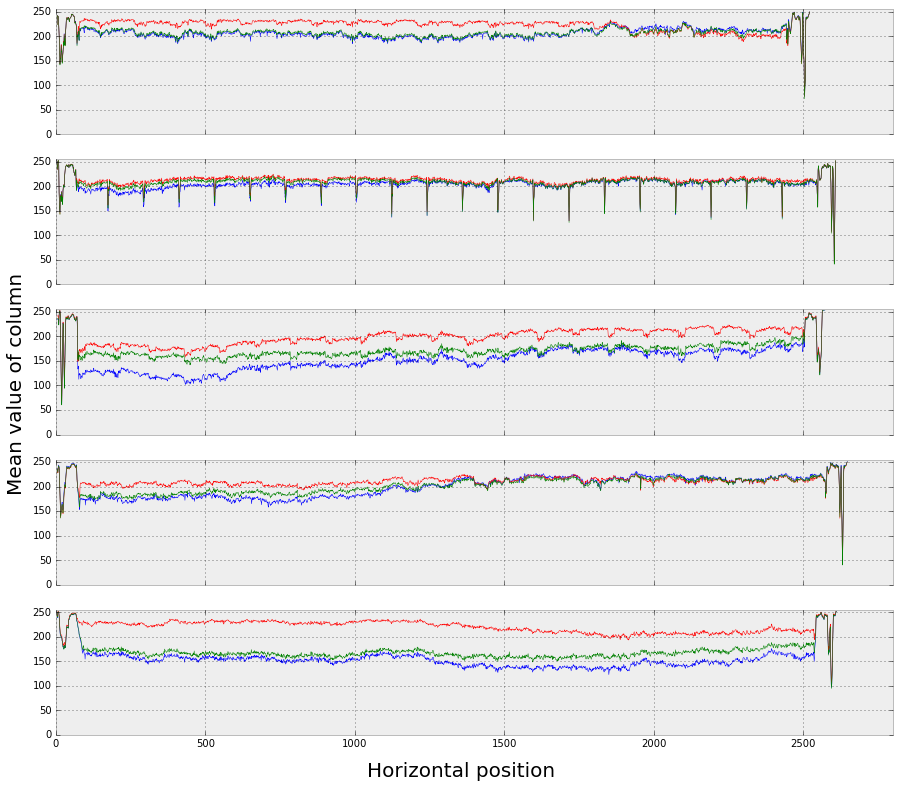

In [98]:
f, axs = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(15, 13))
for j, img in enumerate(sample_imgs):
    r, g, b = cv2.split(img)
    axs[j].plot(np.mean(b, axis=0), 'b', lw=0.5)
    axs[j].plot(np.mean(r, axis=0), 'r', lw=0.5)
    axs[j].plot(np.mean(g, axis=0), 'g' ,lw=0.5)
    axs[j].set_ylim(0, 255)
    axs[j].set_xlim(0, 2800)
f.text(0.5, 0.08, 'Horizontal position', ha='center', fontsize=20)
f.text(0.08, 0.5, 'Mean value of column', va='center', rotation='vertical', fontsize=20);

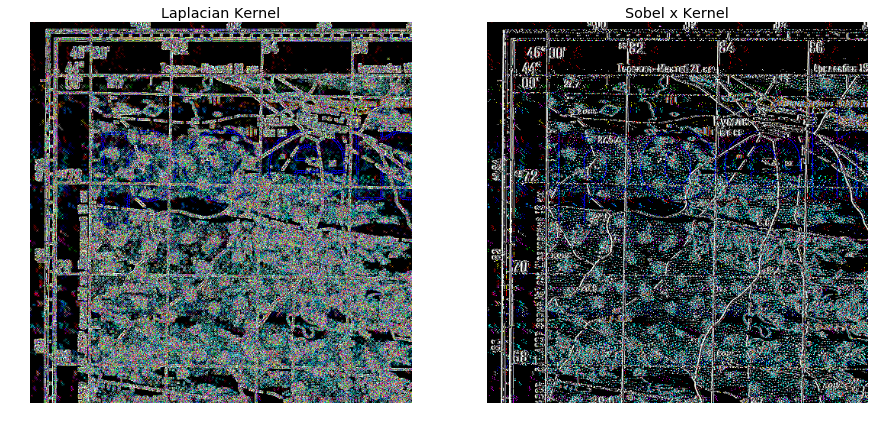

In [133]:
# Detecting the map's corners
f, axs = plt.subplots(1, 2, figsize=(15, 7))
img_x_grad_sobel = cv2.Sobel(sample_imgs[0], ddepth=cv2.CV_64F, dx=1, dy=0, ksize=1)
img_x_grad_lapl = cv2.Laplacian(sample_imgs[0], cv2.CV_64F, ksize=3)
axs[0].imshow(img_x_grad_lapl[:500, :500], cmap='gray'); axs[0].set_title('Laplacian Kernel')
axs[1].imshow(img_x_grad_sobel[:500, :500], cmap='gray'); axs[1].set_title('Sobel x Kernel')
axs[0].axis('off'); axs[1].axis('off');